# DECISION TREES

FLAG DATA
TRAINING =  (4768, 37)
TEST =  (1192, 37)
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            943.0       943.000000
mean               1.0     13175.582185
std                0.0     10775.527468
min                1.0       224.000000
25%                1.0      5427.500000
50%                1.0     10811.000000
75%                1.0     17262.500000
max                1.0     78987.000000
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            246.0       246.000000
mean               1.0     14330.723577
std                0.0     11055.483042
min                1.0       373.000000
25%                1.0      6345.500000
50%                1.0     11876.500000
75%                1.0     18316.000000
max                1.0     57268.000000



       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            943.0       943.000000
mean               1.0     11141.063627
std                0.0      6353.670305
min                1.0       224.000000
25%                1.0   

/var/folders/f2/qszbjcs964d9z5ywyc7cwpj80000gn/T/ipykernel_5483/2797899720.py:241: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")


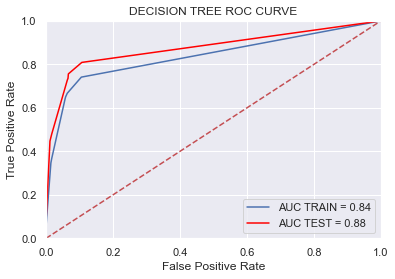

MEAN Train 11141.063626723224
MEAN Test 11953.817073170732
 ----- 


TREE RMSE Train: 2761.3614519513785
TREE RMSE Test: 3555.799180471987


LOAN
IMP_NINQ
IMP_CLNO
M_DEBTINC
IMP_DEBTINC
FLAG= ['M_DEBTINC', 'IMP_DEBTINC', 'IMP_VALUE', 'M_DEROG', 'IMP_DELINQ', 'IMP_CLAGE']
 ==== 


AMOUNT= ['LOAN', 'IMP_NINQ', 'IMP_CLNO', 'M_DEBTINC', 'IMP_DEBTINC']


In [1]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree



sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

INFILE = "~/Desktop/Edwin/Academic/Summer2022/MSDS422/Programming/A2/HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )


dt = df.dtypes
#print( dt )

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )


"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )



'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''
df["y_REASON_3"] = (df.IMP_REASON.isin( ["a_DebtCon"] ) + 0 )
df["y_REASON_2"] = (df.IMP_JOB.isin( ["a_DebtCon","b_HomeImp"] ) + 0)
df["y_REASON_1"] = (df.IMP_JOB.isin( ["a_DebtCon","b_HomeImp","c_MISSING"] ) + 0)
df["y_JOB_7"] = (df.IMP_JOB.isin( ["a_Other"] ) + 0 )
df["y_JOB_6"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING"] ) + 0)
df["y_JOB_5"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office"] ) + 0)
df["y_JOB_4"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales"] ) + 0)
df["y_JOB_3"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr"] ) + 0)
df["y_JOB_2"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe"] ) + 0)
df["y_JOB_1"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe","g_Self"] ) + 0)
# df = df.drop( "IMP_JOB", axis=1 )
 
   

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )


i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["DebtCon"]), IMP ] = 3928
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["HomeImp"]), IMP ] = 1780
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["MISSING"]), IMP ] = 252
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 767
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 948
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 2388
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Doctor"]), IMP ] = 1276
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 109
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 193
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)


for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )

for i in objList:
    df = df.drop( i, axis=1 )




"""
SPLIT DATA
"""

X = df.copy()
X = X.drop( TARGET_F, axis=1 )
X = X.drop( TARGET_A, axis=1 )

Y = df[ [TARGET_F, TARGET_A] ]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2 )

print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )


F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")

F = Z_train[ TARGET_A ] > 20000
Z_train.loc[ F, TARGET_A ] = 20000

F = Z_test[ TARGET_A ] > 20000
Z_test.loc[ F, [TARGET_A] ] = 20000

print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")


print( " ====== ")

print( "AMOUNT DATA" )
print( "TRAINING = ", W_train.shape )
print( "TEST = ", Z_test.shape )



"""
DECISION TREE
"""

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list



# Default PROBABILITY 

fm01_Tree = tree.DecisionTreeClassifier( max_depth=3 )
fm01_Tree = fm01_Tree.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

print("\n=============\n")
print("DECISION TREE\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")


probs = fm01_Tree.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_Tree.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test


plt.title('DECISION TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


feature_cols = list( X.columns.values )
tree.export_graphviz(fm01_Tree,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
vars_tree_flag = getTreeVars( fm01_Tree, feature_cols ) 







# LOSSES

amt_m01_Tree = tree.DecisionTreeRegressor( max_depth= 4 )
amt_m01_Tree = amt_m01_Tree.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

print( "MEAN Train", Z_train[TARGET_A].mean() )
print( "MEAN Test", Z_test[TARGET_A].mean() )
print( " ----- \n\n" )

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("TREE RMSE Train:", RMSE_TRAIN )
print("TREE RMSE Test:", RMSE_TEST )

RMSE_TREE = RMSE_TEST

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
tree.export_graphviz(amt_m01_Tree,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

print("\n")
for i in vars_tree_amt :
    print(i)


print( "FLAG=",vars_tree_flag )
print(" ==== \n\n")
print( "AMOUNT=",vars_tree_amt )







# RANDOM FOREST

FLAG DATA
TRAINING =  (4768, 37)
TEST =  (1192, 37)
AMOUNT DATA
TRAINING =  (958, 37)
TEST =  (231, 2)


RANDOM FOREST

Probability of Default
Accuracy Train: 0.9989513422818792
Accuracy Test: 0.9035234899328859


('M_DEBTINC', 100)
('IMP_DEBTINC', 74)
('IMP_VALUE', 59)
('IMP_CLAGE', 47)
('LOAN', 42)
('IMP_DELINQ', 42)
('IMP_MORTDUE', 39)
('IMP_CLNO', 37)
('IMP_YOJ', 30)
('IMP_DEROG', 24)
('IMP_NINQ', 21)


/var/folders/f2/qszbjcs964d9z5ywyc7cwpj80000gn/T/ipykernel_5483/2706596724.py:356: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")


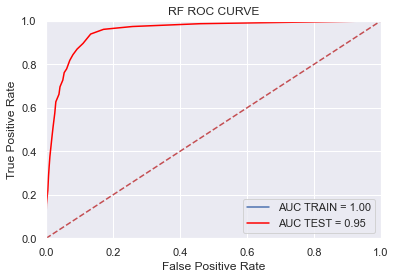

MEAN Train 11982.96764091858
MEAN Test 12678.974025974027
 ----- 


RF RMSE Train: 3400.9709939550225
RF RMSE Test: 3725.7410795528695


LOAN
IMP_CLNO
M_DEBTINC
IMP_DEBTINC


In [2]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 



sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


INFILE = "~/Desktop/Edwin/Academic/Summer2022/MSDS422/Programming/A2/HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )

dt = df.dtypes
#print( dt )

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )


"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )



'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''
df["y_REASON_3"] = (df.IMP_REASON.isin( ["a_DebtCon"] ) + 0 )
df["y_REASON_2"] = (df.IMP_JOB.isin( ["a_DebtCon","b_HomeImp"] ) + 0)
df["y_REASON_1"] = (df.IMP_JOB.isin( ["a_DebtCon","b_HomeImp","c_MISSING"] ) + 0)
df["y_JOB_7"] = (df.IMP_JOB.isin( ["a_Other"] ) + 0 )
df["y_JOB_6"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING"] ) + 0)
df["y_JOB_5"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office"] ) + 0)
df["y_JOB_4"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales"] ) + 0)
df["y_JOB_3"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr"] ) + 0)
df["y_JOB_2"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe"] ) + 0)
df["y_JOB_1"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe","g_Self"] ) + 0)
   

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )



i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["DebtCon"]), IMP ] = 3928
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["HomeImp"]), IMP ] = 1780
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["MISSING"]), IMP ] = 252
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 767
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 948
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 2388
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Doctor"]), IMP ] = 1276
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 109
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 193
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)


for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )

for i in objList:
    df = df.drop( i, axis=1 )




"""
SPLIT DATA
"""

X = df.copy()
X = X.drop( TARGET_F, axis=1 )
X = X.drop( TARGET_A, axis=1 )

Y = df[ [TARGET_F, TARGET_A] ]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2 )

print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )


F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

#print( Z_train.describe() )
#print( Z_test.describe() )
#print( "\n\n")

F = Z_train[ TARGET_A ] > 25000
Z_train.loc[ F, TARGET_A ] = 25000

F = Z_test[ TARGET_A ] > 25000
Z_test.loc[ F, [TARGET_A] ] = 25000

#print( Z_train.describe() )
#print( Z_test.describe() )
#print( "\n\n")


print( " ====== ")

print( "AMOUNT DATA" )
print( "TRAINING = ", W_train.shape )
print( "TEST = ", Z_test.shape )



"""
DECISION TREE
"""

# def getTreeVars( TREE, varNames ) :
#     tree_ = TREE.tree_
#     varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

#     nameSet = set()
#     for i in tree_.feature :
#         if i != _tree.TREE_UNDEFINED :
#             nameSet.add( i )
#     nameList = list( nameSet )
#     parameter_list = list()
#     for i in nameList :
#         parameter_list.append( varNames[i] )
#     return parameter_list



# # Default PROBABILITY

# fm01_Tree = tree.DecisionTreeClassifier( max_depth=3 )
# fm01_Tree = fm01_Tree.fit( X_train, Y_train[ TARGET_F ] )

# Y_Pred_train = fm01_Tree.predict(X_train)
# Y_Pred_test = fm01_Tree.predict(X_test)

# ##print("\n=============\n")
# ##print("DECISION TREE\n")
# ##print("Probability of Default")
# ##print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
# ##print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
# ##print("\n")


# probs = fm01_Tree.predict_proba(X_train)
# p1 = probs[:,1]
# fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
# roc_auc_train = metrics.auc(fpr_train, tpr_train)

# probs = fm01_Tree.predict_proba(X_test)
# p1 = probs[:,1]
# fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
# roc_auc_test = metrics.auc(fpr_test, tpr_test)

# fpr_tree = fpr_test
# tpr_tree = tpr_test
# auc_tree = roc_auc_test


# plt.title('TREE ROC CURVE')
# plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
# plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()


# feature_cols = list( X.columns.values )
# tree.export_graphviz(fm01_Tree,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
# vars_tree_flag = getTreeVars( fm01_Tree, feature_cols ) 







# # LOSSES

# amt_m01_Tree = tree.DecisionTreeRegressor( max_depth= 4 )
# amt_m01_Tree = amt_m01_Tree.fit( W_train, Z_train[TARGET_A] )

# Z_Pred_train = amt_m01_Tree.predict(W_train)
# Z_Pred_test = amt_m01_Tree.predict(W_test)

# print( "MEAN Train", Z_train[TARGET_A].mean() )
# print( "MEAN Test", Z_test[TARGET_A].mean() )
# print( " ----- \n\n" )

# RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
# RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

# print("TREE RMSE Train:", RMSE_TRAIN )
# print("TREE RMSE Test:", RMSE_TEST )

# RMSE_TREE = RMSE_TEST

# feature_cols = list( X.columns.values )
# vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
# tree.export_graphviz(amt_m01_Tree,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

# print("\n")
# for i in vars_tree_amt :
#    print(i)





"""
RANDOM FOREST
"""



def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList



fm01_RF = RandomForestClassifier( n_estimators = 25, random_state=1 )
fm01_RF = fm01_RF.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

print("\n=============\n")
print("RANDOM FOREST\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")

probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

for i in vars_RF_flag :
   print( i )

plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()








# # LOSSES

amt_m01_Tree = tree.DecisionTreeRegressor( max_depth= 4 )
amt_m01_Tree = amt_m01_Tree.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

print( "MEAN Train", Z_train[TARGET_A].mean() )
print( "MEAN Test", Z_test[TARGET_A].mean() )
print( " ----- \n\n" )

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("RF RMSE Train:", RMSE_TRAIN )
print("RF RMSE Test:", RMSE_TEST )

RMSE_TREE = RMSE_TEST

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
tree.export_graphviz(amt_m01_Tree,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

print("\n")
for i in vars_tree_amt :
   print(i)






# GRADIENT BOOSTING



GRADIENT BOOSTING

Probability of Default
Accuracy Train: 0.927013422818792
Accuracy Test: 0.9077181208053692


('M_DEBTINC', 100)
('IMP_DEBTINC', 27)
('IMP_DELINQ', 17)
('IMP_VALUE', 15)
('IMP_CLAGE', 13)
('IMP_DEROG', 6)
('IMP_CLNO', 6)


/var/folders/f2/qszbjcs964d9z5ywyc7cwpj80000gn/T/ipykernel_5483/323536525.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")


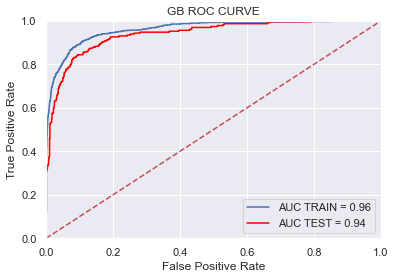

GB RMSE Train: 1094.2820090488412
GB RMSE Test: 1727.4446755335696
('LOAN', 100)
('IMP_CLNO', 16)
('M_DEBTINC', 9)
('IMP_DEBTINC', 8)
('IMP_CLAGE', 5)


In [3]:
fm01_GB = GradientBoostingClassifier( random_state=1 )
fm01_GB = fm01_GB.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

print("\n=============\n")
print("GRADIENT BOOSTING\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")

probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )


for i in vars_GB_flag :
   print(i)



plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()





amt_m01_GB = GradientBoostingRegressor(random_state=1)
amt_m01_GB = amt_m01_GB.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_GB.predict(W_train)
Z_Pred_test = amt_m01_GB.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("GB RMSE Train:", RMSE_TRAIN )
print("GB RMSE Test:", RMSE_TEST )

RMSE_GB = RMSE_TEST

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( amt_m01_GB, feature_cols )


for i in vars_GB_amt :
   print(i)

# ROC CURVES



GRADIENT BOOSTING

Probability of Default
Accuracy Train: 0.9240771812080537
Accuracy Test: 0.9068791946308725


GB RMSE Train: 1058.6238887476284
GB RMSE Test: 1833.9288497813195


/var/folders/f2/qszbjcs964d9z5ywyc7cwpj80000gn/T/ipykernel_5483/3272091115.py:488: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color="red")
/var/folders/f2/qszbjcs964d9z5ywyc7cwpj80000gn/T/ipykernel_5483/3272091115.py:489: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_RF, color="green")
/var/folders/f2/qszbjcs964d9z5ywyc7cwpj80000gn/T/ipykernel_5483/3272091115.py:490: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0

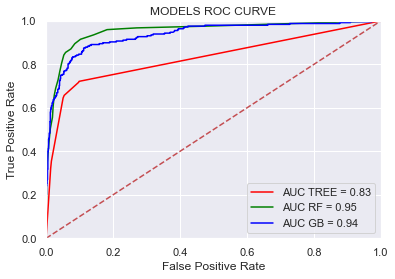

Root Mean Square Average For Losses
DECISION TREE: 3942.9974837311943
RANDOM FOREST: 2183.360988616149
GRADIENT BOOSTING: 1833.9288497813195


In [4]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 



sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


INFILE = "~/Desktop/Edwin/Academic/Summer2022/MSDS422/Programming/A2/HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )

dt = df.dtypes
#print( dt )

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )


"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )



'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''
df["y_REASON_3"] = (df.IMP_REASON.isin( ["a_DebtCon"] ) + 0 )
df["y_REASON_2"] = (df.IMP_JOB.isin( ["a_DebtCon","b_HomeImp"] ) + 0)
df["y_REASON_1"] = (df.IMP_JOB.isin( ["a_DebtCon","b_HomeImp","c_MISSING"] ) + 0)
df["y_JOB_7"] = (df.IMP_JOB.isin( ["a_Other"] ) + 0 )
df["y_JOB_6"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING"] ) + 0)
df["y_JOB_5"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office"] ) + 0)
df["y_JOB_4"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales"] ) + 0)
df["y_JOB_3"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr"] ) + 0)
df["y_JOB_2"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe"] ) + 0)
df["y_JOB_1"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe","g_Self"] ) + 0)
   

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )


i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["DebtCon"]), IMP ] = 3928
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["HomeImp"]), IMP ] = 1780
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["MISSING"]), IMP ] = 252
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 767
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 948
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 2388
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Doctor"]), IMP ] = 1276
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 109
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 193
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)



for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )

for i in objList:
    df = df.drop( i, axis=1 )




"""
SPLIT DATA
"""

X = df.copy()
X = X.drop( TARGET_F, axis=1 )
X = X.drop( TARGET_A, axis=1 )

Y = df[ [TARGET_F, TARGET_A] ]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2 )

##print( "FLAG DATA" )
##print( "TRAINING = ", X_train.shape )
##print( "TEST = ", X_test.shape )


F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

#print( Z_train.describe() )
#print( Z_test.describe() )
#print( "\n\n")

F = Z_train[ TARGET_A ] > 25000
Z_train.loc[ F, TARGET_A ] = 25000

F = Z_test[ TARGET_A ] > 25000
Z_test.loc[ F, [TARGET_A] ] = 25000

#print( Z_train.describe() )
#print( Z_test.describe() )
#print( "\n\n")


##print( " ====== ")
##
##print( "AMOUNT DATA" )
##print( "TRAINING = ", W_train.shape )
##print( "TEST = ", Z_test.shape )



"""
DECISION TREE
"""

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list



# CRASH PROBABILITY

fm01_Tree = tree.DecisionTreeClassifier( max_depth=3 )
fm01_Tree = fm01_Tree.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

##print("\n=============\n")
##print("DECISION TREE\n")
##print("Probability of crash")
##print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
##print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
##print("\n")


probs = fm01_Tree.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_Tree.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test


##plt.title('TREE ROC CURVE')
##plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
##plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
##plt.legend(loc = 'lower right')
##plt.plot([0, 1], [0, 1],'r--')
##plt.xlim([0, 1])
##plt.ylim([0, 1])
##plt.ylabel('True Positive Rate')
##plt.xlabel('False Positive Rate')
##plt.show()


feature_cols = list( X.columns.values )
tree.export_graphviz(fm01_Tree,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
vars_tree_flag = getTreeVars( fm01_Tree, feature_cols ) 







# DAMAGES

amt_m01_Tree = tree.DecisionTreeRegressor( max_depth= 4 )
amt_m01_Tree = amt_m01_Tree.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

#print( "MEAN Train", Z_train[TARGET_A].mean() )
#print( "MEAN Test", Z_test[TARGET_A].mean() )
#print( " ----- \n\n" )

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

#print("TREE RMSE Train:", RMSE_TRAIN )
#print("TREE RMSE Test:", RMSE_TEST )

RMSE_TREE = RMSE_TEST

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
tree.export_graphviz(amt_m01_Tree,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

#print("\n")
#for i in vars_tree_amt :
#    print(i)





"""
RANDOM FOREST
"""



def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList



fm01_RF = RandomForestClassifier( n_estimators = 25, random_state=1 )
fm01_RF = fm01_RF.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

##print("\n=============\n")
##print("RANDOM FOREST\n")
##print("Probability of crash")
##print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
##print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
##print("\n")

probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

#for i in vars_RF_flag :
#    print( i )

##plt.title('RF ROC CURVE')
##plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
##plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
##plt.legend(loc = 'lower right')
##plt.plot([0, 1], [0, 1],'r--')
##plt.xlim([0, 1])
##plt.ylim([0, 1])
##plt.ylabel('True Positive Rate')
##plt.xlabel('False Positive Rate')
##plt.show()





amt_m01_RF = RandomForestRegressor(n_estimators = 100, random_state=1)
amt_m01_RF = amt_m01_RF.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_RF.predict(W_train)
Z_Pred_test = amt_m01_RF.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

##print("RF RMSE Train:", RMSE_TRAIN )
##print("RF RMSE Test:", RMSE_TEST )

RMSE_RF = RMSE_TEST

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( amt_m01_RF, feature_cols )

#for i in vars_RF_amt :
#    print( i )





"""
GRADIENT BOOSTING
"""


fm01_GB = GradientBoostingClassifier( random_state=1 )
fm01_GB = fm01_GB.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

print("\n=============\n")
print("GRADIENT BOOSTING\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")

probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )


##for i in vars_GB_flag :
##    print(i)
##
##
##
##plt.title('GB ROC CURVE')
##plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
##plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
##plt.legend(loc = 'lower right')
##plt.plot([0, 1], [0, 1],'r--')
##plt.xlim([0, 1])
##plt.ylim([0, 1])
##plt.ylabel('True Positive Rate')
##plt.xlabel('False Positive Rate')
##plt.show()





amt_m01_GB = GradientBoostingRegressor(random_state=1)
amt_m01_GB = amt_m01_GB.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_GB.predict(W_train)
Z_Pred_test = amt_m01_GB.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("GB RMSE Train:", RMSE_TRAIN )
print("GB RMSE Test:", RMSE_TEST )

RMSE_GB = RMSE_TEST

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( amt_m01_GB, feature_cols )


##for i in vars_GB_amt :
##    print(i)










    






plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



print("Root Mean Square Average For Losses")
print("DECISION TREE:", RMSE_TREE)
print("RANDOM FOREST:", RMSE_RF)
print("GRADIENT BOOSTING:", RMSE_GB)
